In [4]:
from os import listdir, makedirs
from os.path import basename, dirname, exists, isfile, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import re
import sys

{'sort': 103.174, 'terasort': 1251.7995, 'wordcount': 277.573, 'kmeans': 139.655, 'pagerank': 831.2925, 'bayes': 61.650999999999996}


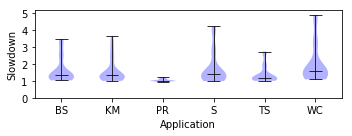

In [5]:

runtimes = dict()
nolimit = dict()
nolimit_medians = dict()
apps = ["bayes", "kmeans", "pagerank", "sort", "terasort", "wordcount"]
short_apps = {"bayes": "BS", "kmeans": "KM", "pagerank": "PR", "sort": "S", "terasort": "TS", "wordcount": "WC"}

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig13/'))

def load_data():
	for app in apps:
		crnt_file = open(join(inputdir, app + ".report"))
		lines = crnt_file.readlines()
		values = [float(re.sub(" +", " ", line.strip()).split(" ")[4]) for line in lines]
		runtimes[app] = values[10:]
		nolimit[app] = values[0:10]
		crnt_file.close()
		
def get_95th_perc(arr):
	perc = np.percentile(arr, 99)
	ret_arr = [x for x in arr if x < perc]
	return ret_arr
			
def get_statistics(values, message):
	print("==============    " + message + "   ============")
	result = dict()
	result["avg"] = np.mean(values)
	result["std"] = np.std(values)
	result["npoints"] = len(values)
	result["99th"] = np.percentile(values, 99)
	result["75th"] = np.percentile(values, 75)
	result["50th"] = np.percentile(values, 50)
	result["25th"] = np.percentile(values, 25)
	result["1st"] = np.percentile(values, 1)
	result["CoV"] = result["std"] / result["avg"]
	result["min"] = np.min(values)
	result["max"] = np.max(values)
	print(result)
	print("================================")
	return result


load_data()

for key in nolimit:
	nolimit_medians[key] = np.median(nolimit[key])
	
print(nolimit_medians)

runtime_values = []

for key in sorted(runtimes.keys()):
	#print(runtimes[key])
	runtime_values.append(get_95th_perc(runtimes[key] / nolimit_medians[key]))

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 2))
vp = ax.violinplot(runtime_values, np.arange(0, len(runtimes.keys())), showmedians=True, widths=0.5)

partnames = ["cbars", "cmins", "cmaxes", "cmedians"]

for partname in partnames:
	part = vp[partname]
	part.set_edgecolor("black")
	part.set_linewidth(0.8)

for pc in vp['bodies']:
	pc.set_facecolor("blue")
	pc.set_alpha(0.3)
	
plt.xticks(np.arange(0, len(nolimit_medians.keys())), [short_apps[str(x)] for x in sorted(nolimit_medians.keys())])	
ax.set_ylim(0, 5.2)
ax.set_xlabel("Application")
ax.set_ylabel("Slowdown")
ax.set_yticks(np.arange(0, 6, 1))
plt.tight_layout()

plt.show()


